###### Naveen Kusakula - B00781205
###### Theja Manasa Thatipatri - B00813459

In [422]:
  from rtree import index
  from rtree.index import Rtree
  p = index.Property()
  idx = index.Index(properties=p)
  idx

In [293]:
#Ref: Special Topics in Data Science: Lab5
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point
import shapely
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [294]:
#reading AIS Data from CSV file
df=pd.read_csv('AISData.csv')

In [295]:
# renaming X and Y coordinates 
df.rename(columns={'location.coordinates.0': 'x', 'location.coordinates.1': 'y'}, inplace=True)

In [296]:
gdf = gpd.GeoDataFrame(df.drop(['x', 'y'], axis=1),
                                crs={'init': 'epsg:4326'},
                                geometry=[shapely.geometry.Point(xy) for xy in zip(df.x, df.y)])

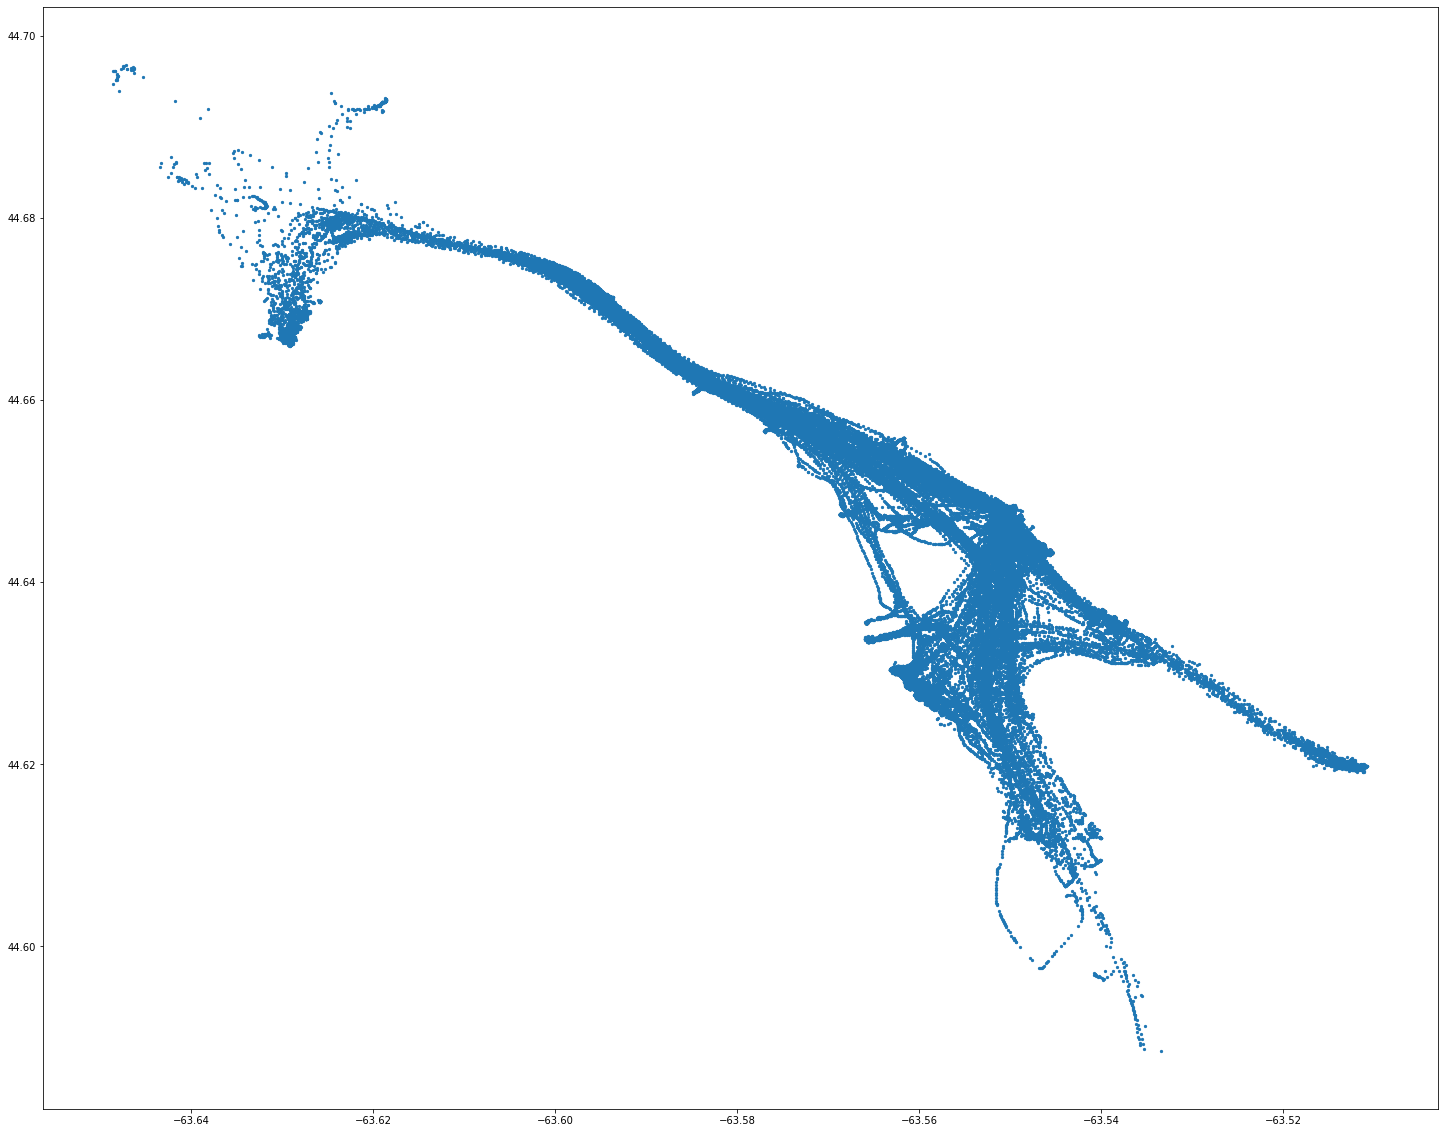

In [297]:
#AIS message data plotted as graph 
ax=gdf.plot(figsize=(25,25),markersize=5)

In [298]:
#Reading Data from shape file to get the polygons of all the ports
nima=gpd.read_file('assignment3shapefile.shp')
portshapes=nima.set_index(['port_name'])
portshapes

,field_1,size,geometry
port_name,,,
pointpolygon,0,0.0000,"POLYGON ((-63.59160304069519 44.6649292254607,..."
port1,1,0.0018,"POLYGON ((-63.569431 44.649993, -63.5694396674..."
port2,2,0.0018,"POLYGON ((-63.60949000000001 44.675853, -63.60..."
ind,3,0.0000,POLYGON ((-63.54742169380188 44.64697911403847...
port5,4,0.0018,"POLYGON ((-63.568048 44.663875, -63.5680566674..."
port6,5,0.0018,"POLYGON ((-63.555828 44.662453, -63.5558366674..."
port7,6,0.0018,"POLYGON ((-63.547843 44.648763, -63.5478516674..."
south_enterance,7,0.0000,POLYGON ((-63.50715637207031 44.59572358282151...
auto_port,8,0.0015,"POLYGON ((-63.50949499999999 44.62011, -63.509..."


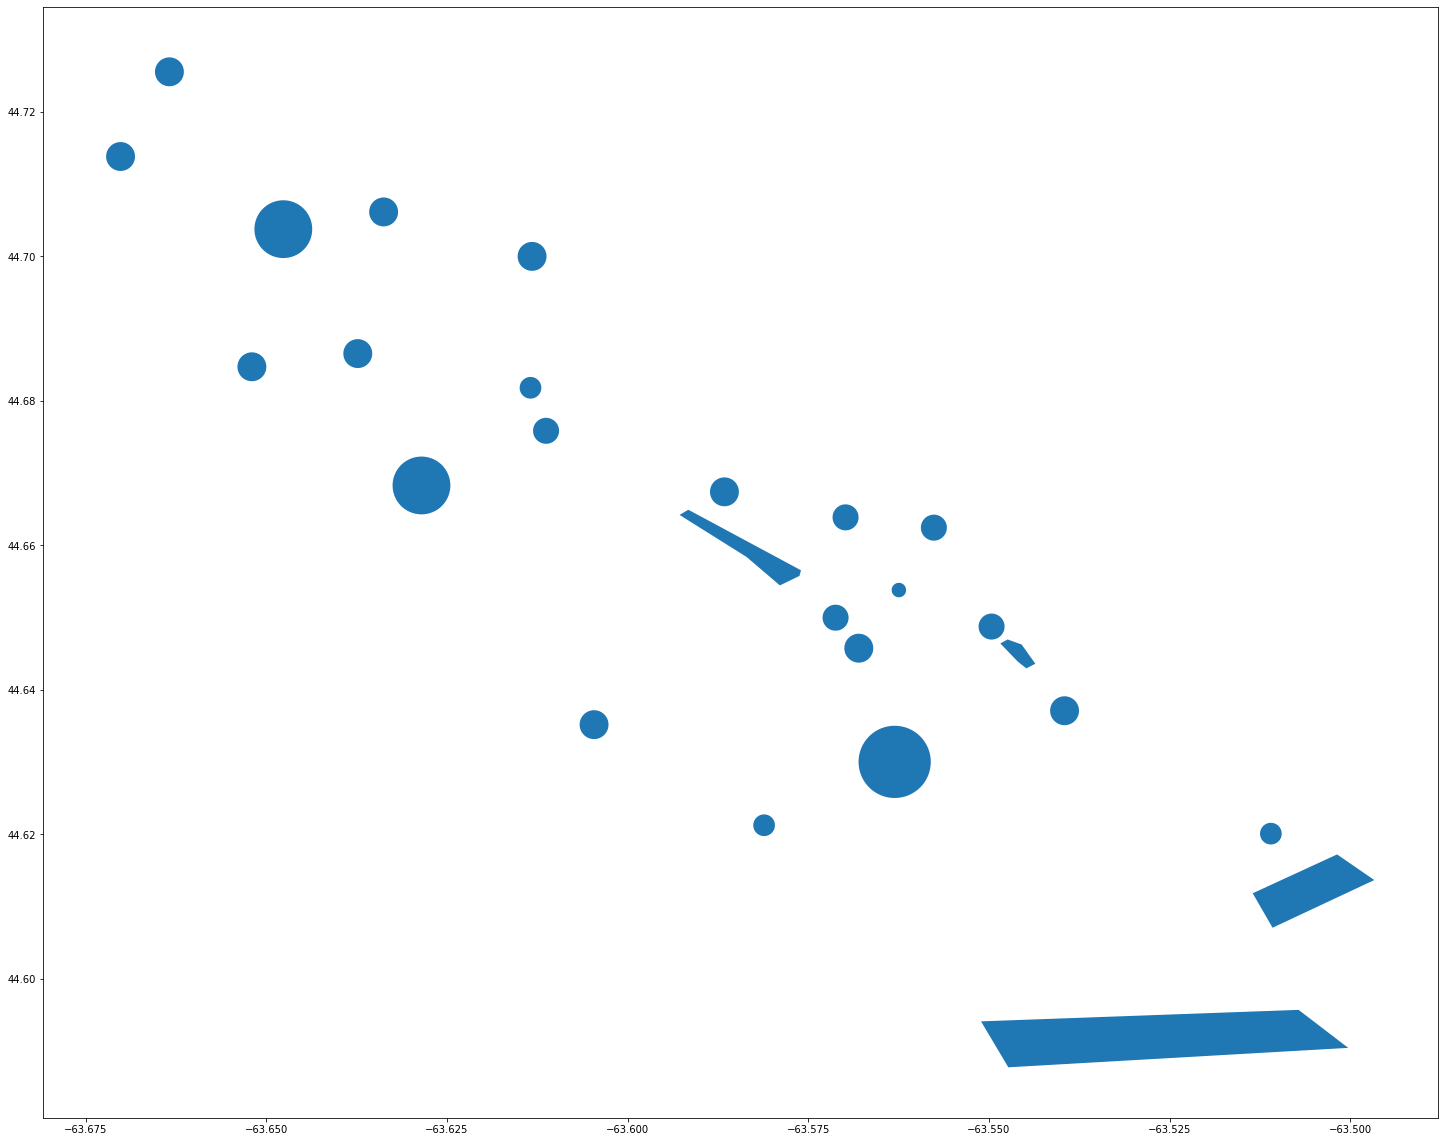

In [299]:
#Plotting all the Plot shapes
portshapes.plot(figsize=(25,25))

In [300]:
#Finding the centroids of the polygons
centroids=portshapes.iloc[0:].centroid
centroids

port_name
pointpolygon                    POINT (-63.5833727909049 44.65930014918037)
port1                          POINT (-63.57123099999995 44.64999299999998)
port2                          POINT (-63.61129000000003 44.67585300000001)
ind                            POINT (-63.54591037582733 44.64508327592169)
port5                          POINT (-63.56984800000002 44.66387500000003)
port6                          POINT (-63.55762800000001 44.66245299999999)
port7                          POINT (-63.54964299999999 44.64876299999999)
south_enterance                POINT (-63.52702775061979 44.59195582645944)
auto_port                               POINT (-63.51099499999998 44.62011)
southend container terminal             POINT (-63.56305200000004 44.63004)
NN Jetty                                       POINT (-63.633767 44.706138)
Bills island                           POINT (-63.61322499999997 44.699988)
mid bedford                    POINT (-63.64764799999999 44.70375500000001)
Fa

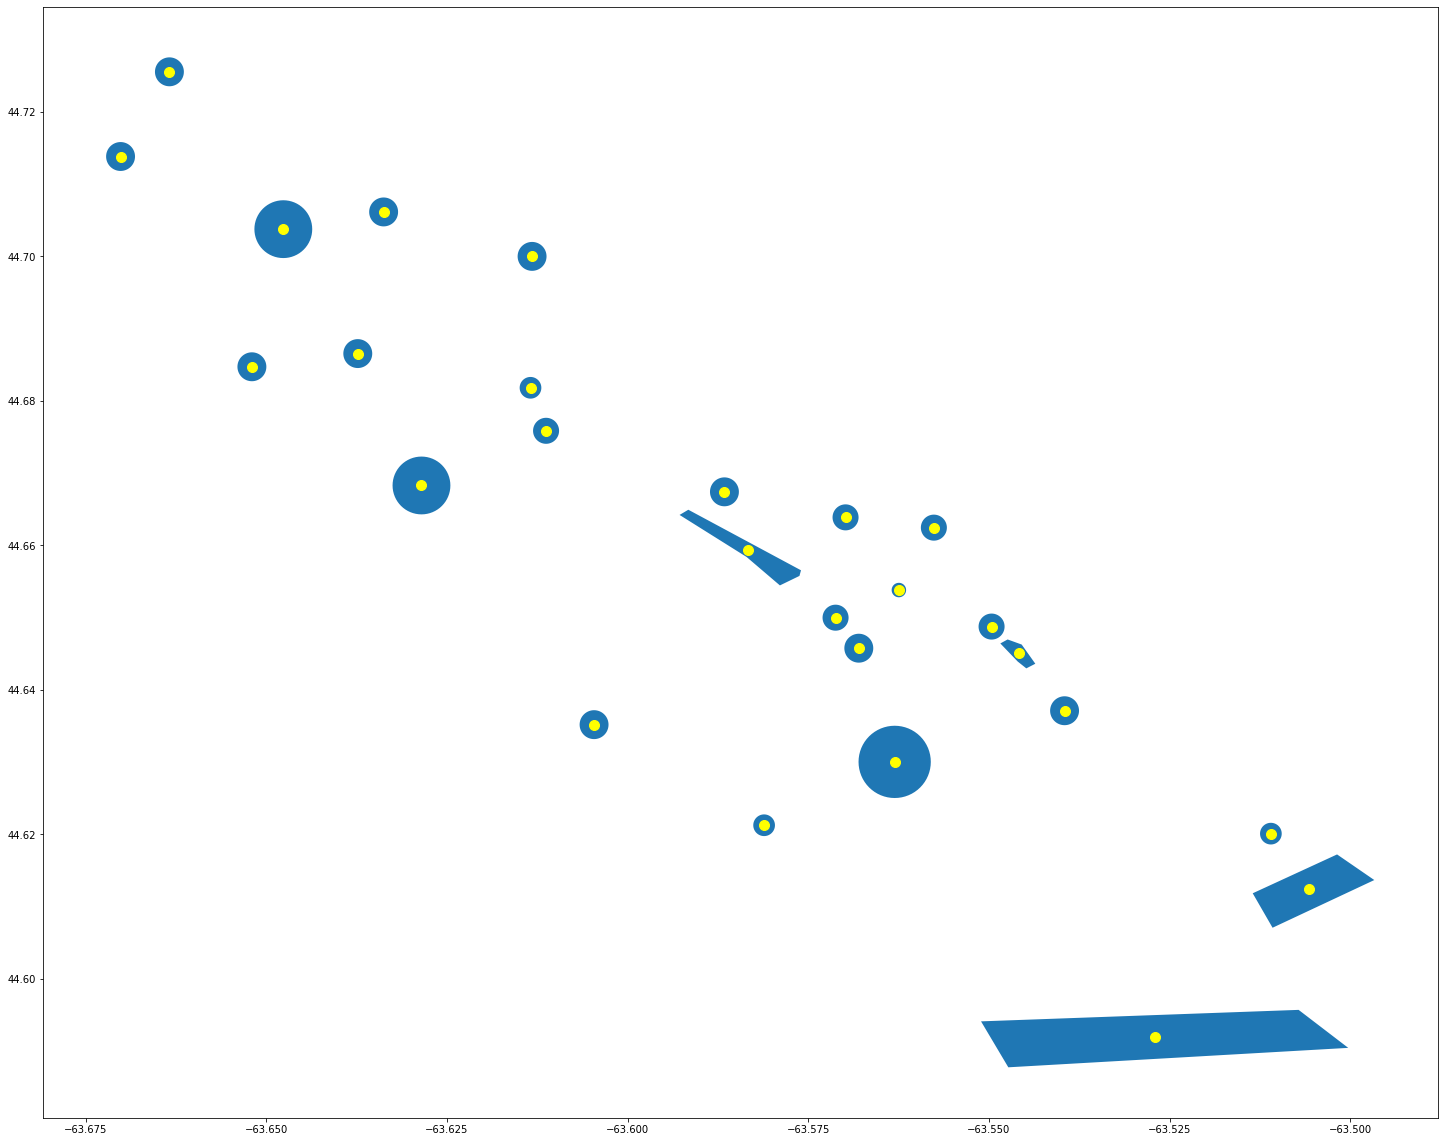

In [301]:
#Plotting all the ports with their centroids
ax=portshapes.iloc[0:].plot(figsize=(25,25))
gpd.GeoSeries(centroids).plot(ax=ax,color='yellow',markersize=100)

In [302]:
ports=[]*len(centroids)

##### 1. Find all the vessels that visited ports in the provided shapefile (Nima_Ports.Zip). For this part,you are going to create a buffer with an appropriate radius around the shape of each allpolygons in the shapefile. Second, you are going to find all the AIS messages (from AIS data)that intersect with these ports. 
 Ans: Below buffer with an appropriate radius of 5 km around the shape of each all polygons in the shapefile is created, as it will appropriate to enclose the points which will include many points, which are shown in colour pink. Plotted the AIS messages that intersecting these ports with colour black for all the AIS data provided

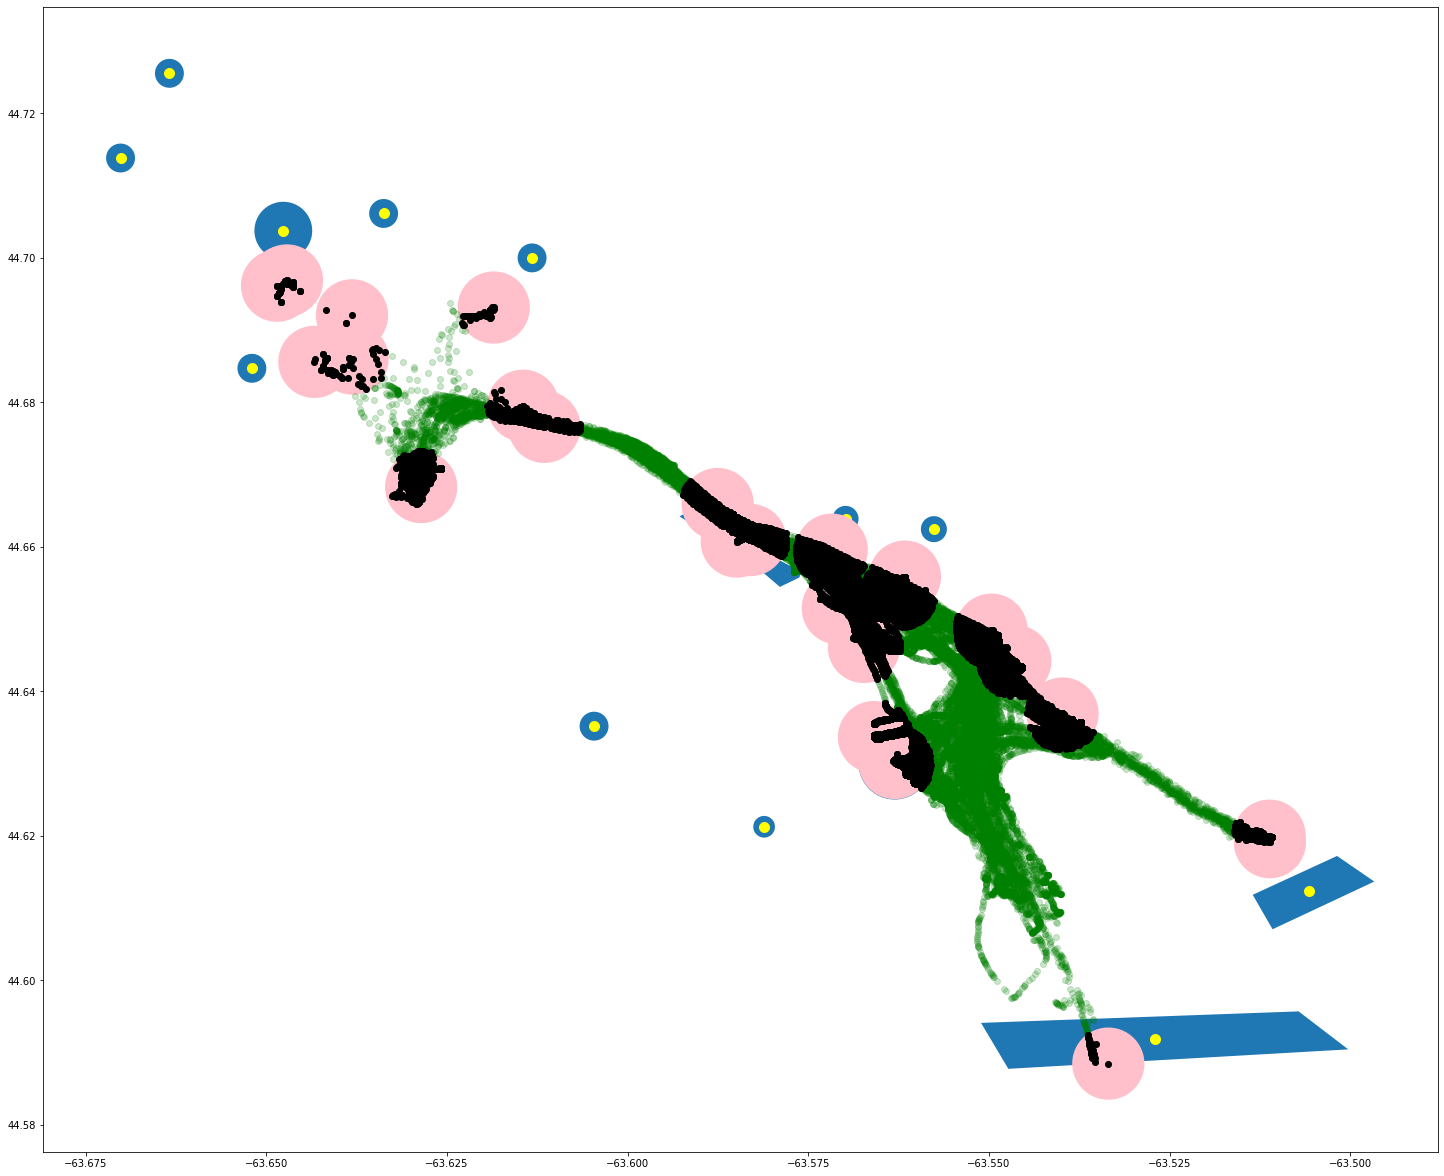

In [303]:
#Ref: Special Topics in Data Science Lab5

for c in centroids:
    ports.append(gdf.loc[gdf.distance(c)==gdf.distance(c).min(),:])

ax=portshapes.iloc[0:].plot(figsize=(25,25))
gpd.GeoSeries(centroids).plot(ax=ax,color='yellow',markersize=100)

for i in range(len(ports)):
    ports[i] = ports[i].iloc[0,:].geometry.buffer(0.005) 

gpd.GeoSeries(ports).plot(ax=ax,color='pink',markersize=400)
gdf.plot(ax=ax,color='g',alpha=0.2)

for p in ports:
    gdf.loc[gdf.within(p),:].plot(ax=ax,color='k')


##### 2. Show the density (i.e., density is the number of AIS messages in a port), of each port on amap by using a colour-coded map. 
Ans: Below Plot depicts only the density i.e., the AIS messages that are within the Port polygons and different colour codes are used to show different ports and all other AIS messges that are outside of the ports are excluded from the plot. 

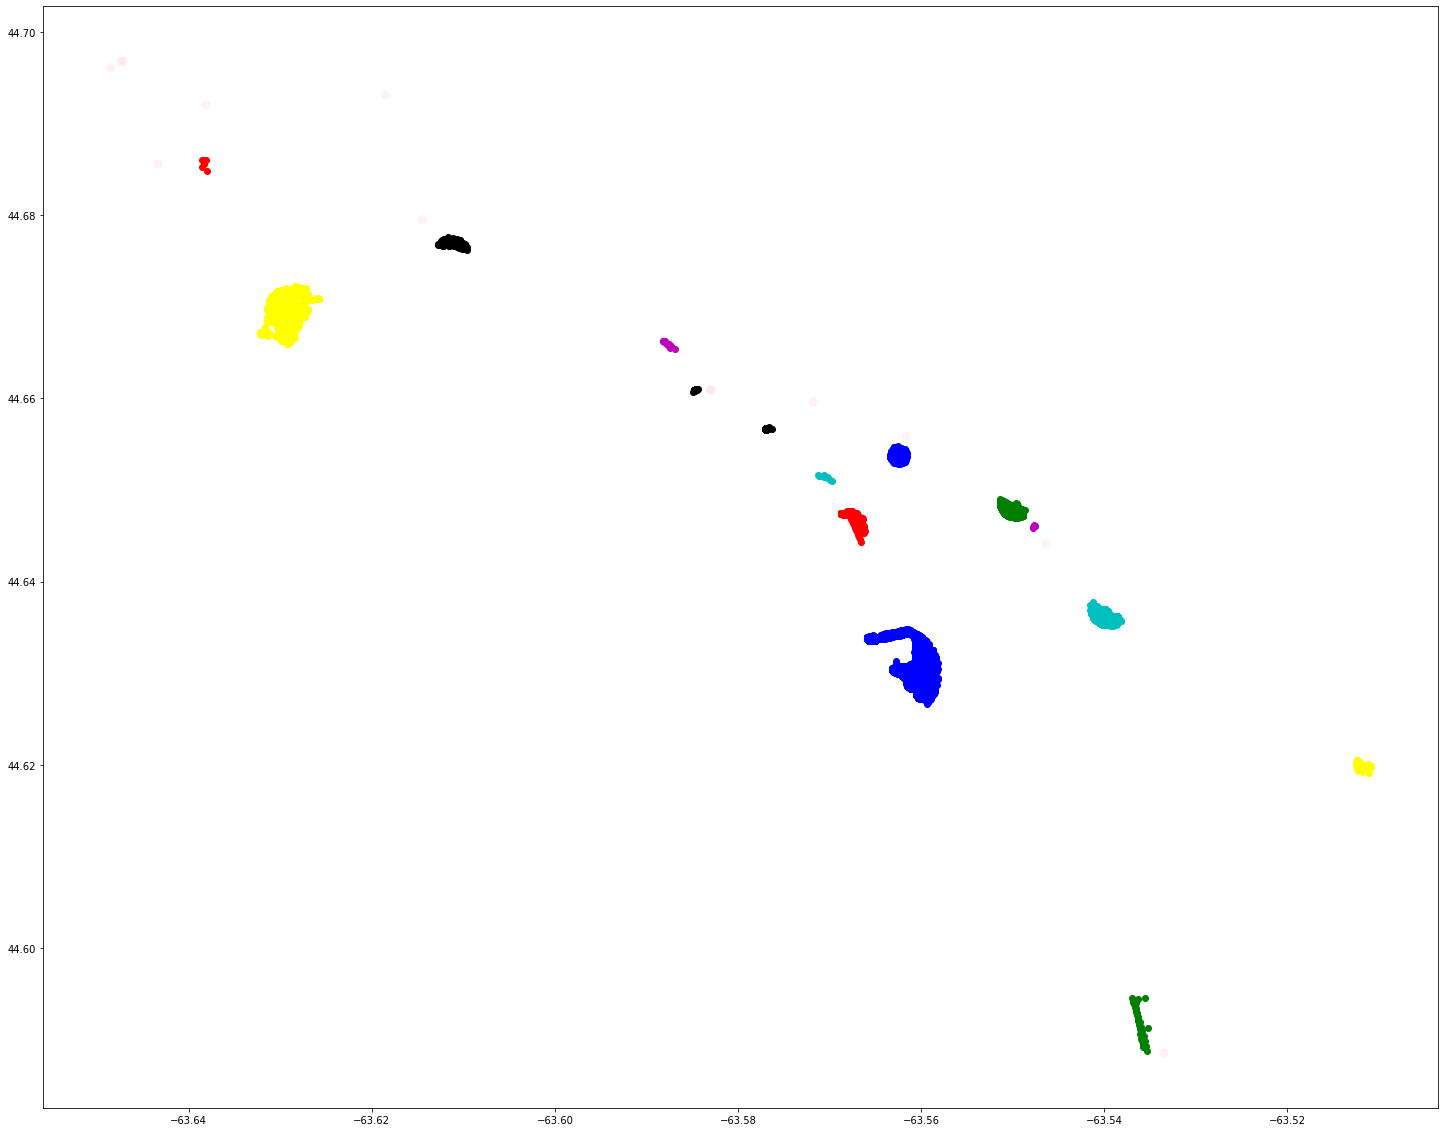

In [290]:
#Ref: Special Topics in Data Science Lab5

joinres=gpd.sjoin(gdf,portname,op='within',how='left')
col=['r','b','g','k','yellow','c','m','r','b','g','k','yellow','c','m']
i=0
ax=gpd.GeoSeries(ports).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)

for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
  if i==14:
    i=0 

##### Question 3: . Now divide the AIS data into data frames with a one-hour interval. Repeat steps 1 and 2 forall of the sub-dataframes. Here each data frame has only information of one hour. Note that ifstep 1 and 2 you are using the whole AIS data as a one-time interval. In step 3, you arerepeating steps 1 and 2 for all of the one-hour intervals. This can generate many plots that youare going to visualize them. You can save all the plots with proper name and title in a folder orgenerate a matplotlib animation to visualize it.
Ans: As multiple graphs needs to be plotted please refer Question3_NaveenKusakula_ThejaManasaThaiparti.ipynb file only one sample interval is shown below

In [398]:
#Given data frame is divided into mulitple dataframes based on houry intervals
#Ref: https://stackoverflow.com/questions/28161356/sort-pandas-dataframe-by-date
dfsorted = df.sort_values(by='event_time')

In [399]:
dataFrames = []

In [400]:
#Splitting the data into intervals of Hours from start to end of the given series
#Ref: https://stackoverflow.com/questions/39609391/pandas-how-to-split-dataframe-by-column-by-interval
S = pd.to_datetime(dfsorted['event_time'])
for i, g in df.groupby([(S - S[0]).astype('timedelta64[h]')]):
    dataFrames.append(g.reset_index(drop=True))

In [401]:
len(dataFrames)

2519

In [402]:
gdf1 = gpd.GeoDataFrame(dataFrames[0].drop(['x', 'y'], axis=1),
                                crs={'init': 'epsg:4326'},
                                geometry=[shapely.geometry.Point(xy) for xy in zip(dataFrames[0].x, dataFrames[0].y)])

In [403]:
ports1=[]*len(centroids)

In [404]:
for c in centroids:
 ports1.append(gdf1.loc[gdf1.distance(c)==gdf1.distance(c).min(),:])

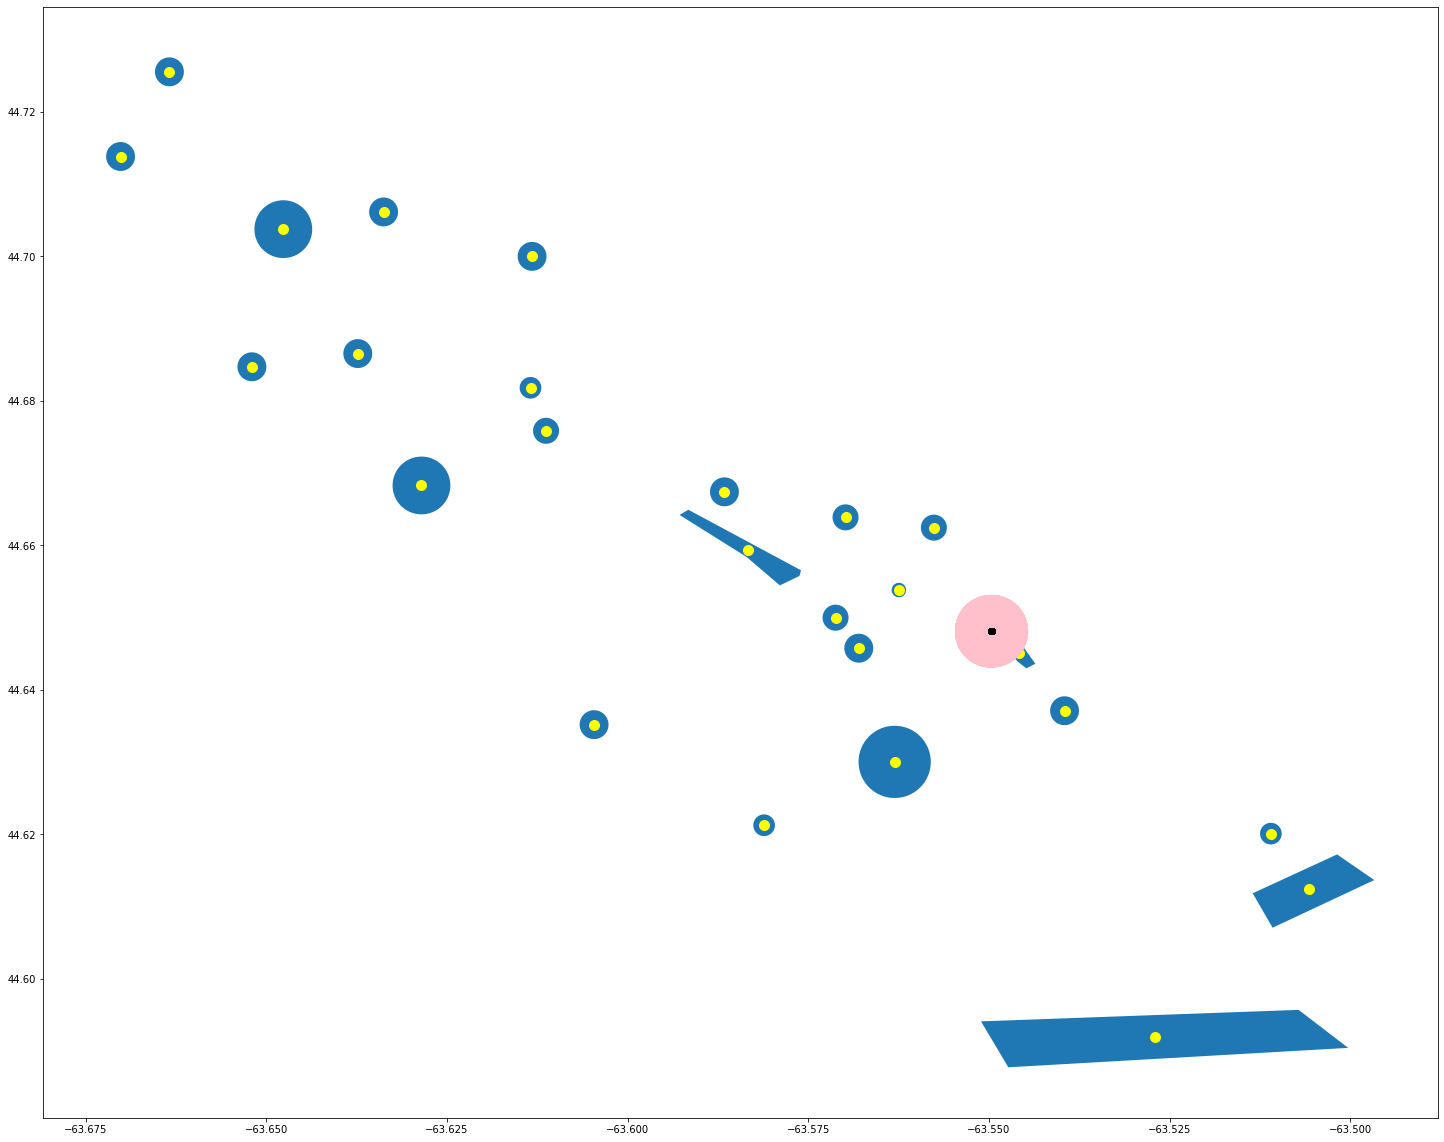

In [405]:
# Step 1: Buffer and AIS intersection for 1 hour data 
ax=portshapes.iloc[0:].plot(figsize=(25,25))
gpd.GeoSeries(centroids).plot(ax=ax,color='yellow',markersize=100)

for i in range(len(ports1)):
    ports1[i] = ports1[i].iloc[0,:].geometry.buffer(0.005) 

gpd.GeoSeries(ports1).plot(ax=ax,color='pink',markersize=400)
gdf1.plot(ax=ax,color='g',alpha=0.2)

for p in ports1:
    gdf1.loc[gdf1.within(p),:].plot(ax=ax,color='k')

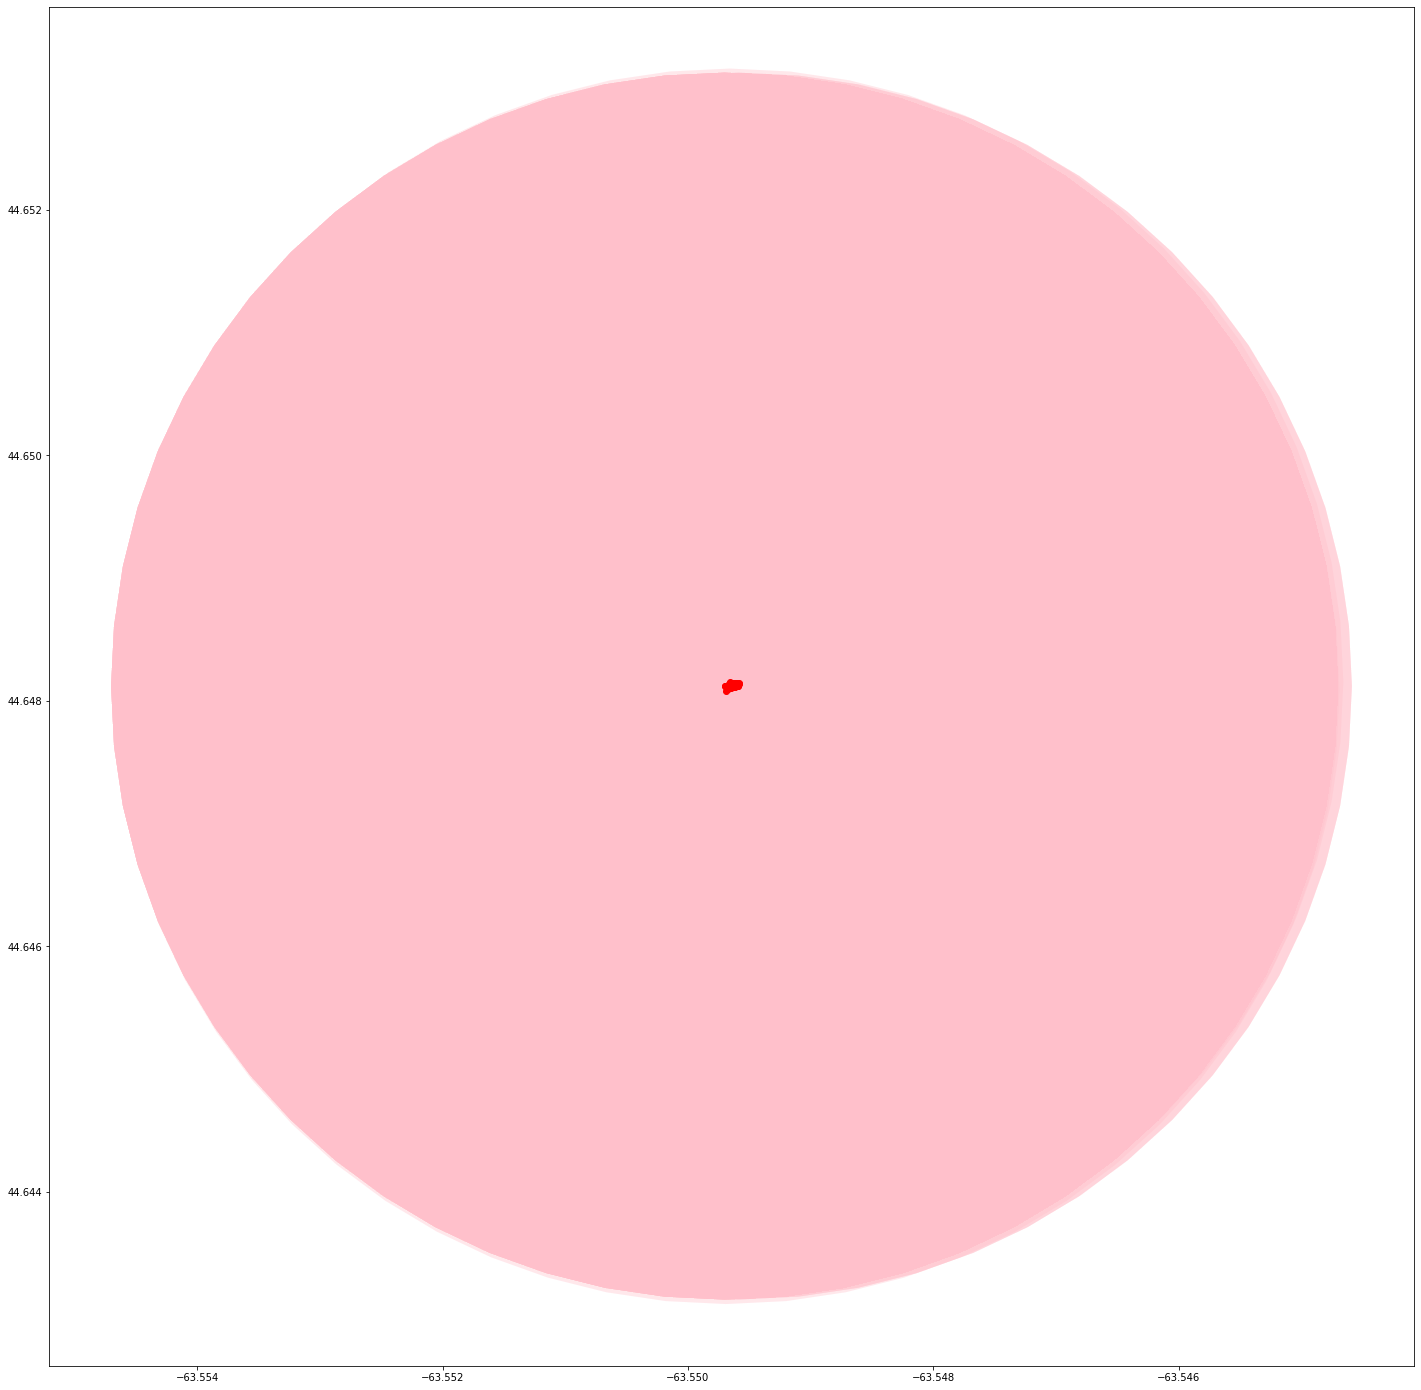

In [407]:
#Step 2: Density of the AIS messages within the Ports polygon for 1 hour data
joinres1=gpd.sjoin(gdf1,portshapes,op='within',how='left')
col=['r','b','g','k','yellow','c','m','r','b','g','k','yellow','c','m']
i=0
ax=gpd.GeoSeries(ports1).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)

for g in set(joinres1['index_right']):
  tmp=joinres1.loc[joinres1['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
  if i==14:
    i=0 

##### 4. Select any port you like. Create a temporal chart for the density of messages in that port.Your x is the time and each snapshot of the time has the density of port at a specific hour. (20points)
Ans: "southend container terminal" port is selected, through observing the density graph plotted in Question2 and AIS messages that are within the "southend container terminal" port are extarcted and the using group by function we have grouped the data in the intervals of hours and the temporal chart with x-axis as Hours and y-axis as density of messages(Number of AIS messages) is plotted.

In [304]:
# Ref: https://stackoverflow.com/questions/48709456/how-to-drop-dataframe-rows-where-x-and-y-coordinates-are-outside-of-polygon
# Data Frame is assigned to Geo Dataframe 
pol_gpd= gpd.GeoDataFrame()
pol_gpd.loc[0,'geometry'] = portname.iloc[9].geometry

In [305]:
#Only points within SCT port is extracted  using join and within feature
pointsWithinSCT=gpd.sjoin(gdf,pol_gpd,op='within')

//anaconda3/lib/python3.7/site-packages/geopandas/tools/sjoin.py:56: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != None)
  '(%s != %s)' % (left_df.crs, right_df.crs))


In [306]:
pointsWithinSCT.sort_values(by='event_time')

,Unnamed: 0,event_time,position_accuracy,mmsi,sog,cog,geometry,index_right
21484,3502,2019-03-06T18:56:49.043Z,NaN,316013808,NaN,NaN,POINT (-63.558455 44.63192666666666),0
21481,3499,2019-03-06T18:56:52.536Z,NaN,316013808,NaN,NaN,POINT (-63.558545 44.63184),0
21478,3496,2019-03-06T18:56:55.656Z,NaN,316013808,NaN,NaN,POINT (-63.55864833333333 44.63175333333334),0
21489,3507,2019-03-06T18:56:59.390Z,NaN,316013808,NaN,NaN,POINT (-63.55877833333334 44.63165666666666),0
21803,3821,2019-03-06T18:57:16.243Z,NaN,316013808,NaN,NaN,POINT (-63.55938666666667 44.63128),0
21802,3820,2019-03-06T18:57:18.643Z,NaN,316013808,NaN,NaN,POINT (-63.55945833333333 44.63123833333334),0
21797,3815,2019-03-06T18:57:30.190Z,NaN,316013808,NaN,NaN,POINT (-63.55987 44.63102333333333),0
21798,3816,2019-03-06T18:57:32.830Z,NaN,316013808,NaN,NaN,POINT (-63.559935 44.63099166666667),0
21709,3727,2019-03-06T18:57:46.856Z,NaN,316013808,NaN,NaN,POINT (-63.56024833333333 44.63087666666666),0
21710,3728,2019-03-06T18:57:49.043Z,NaN,316013808,NaN,NaN,POINT (-63.56028666666667 44.63086666666667),0


In [307]:
pointsWithinSCT['event_time'] = pd.to_datetime(pointsWithinSCT['event_time']).dt.hour

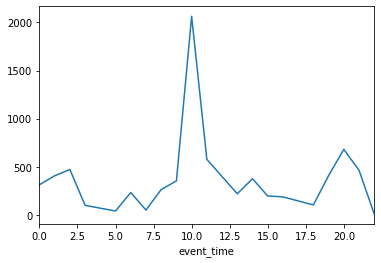

In [308]:
#Below Temporal chart is plotted with X-axis as hours and Y-axis as density of messages in the port at particular time
pointsWithinSCT.groupby(pointsWithinSCT['event_time']).size().plot()

##### 5. Use concept drift methods on step 4 and find out if there is any drift in the data that can bedetected. Try to play with the input parameters and justify the one you chose. Explain why thedrift was detected, what characteristics changed? (25 points)
Ans: The density snap shots from above step is taken and feed into Drift detection functions and changes are logged. In the stream changes are detected as the points may abruptly end, as we have already filtered the AIS messages that only in port, so there will be a drift once the points reaches the boundary of the port or the port polygon.

In [314]:
#Getting the data and converyting them into stream of values
Sequence = pointsWithinSCT['event_time']

In [315]:
stream = Sequence.values

In [316]:
#Ref: Special Topics in Data process Lab7
#Concept drift using ADWIN
import numpy as np
from skmultiflow.drift_detection.adwin import ADWIN
adwin = ADWIN()

for i in range(len(stream)):
    adwin.add_element(stream[i])
    if adwin.detected_change():
        print('Change detected in data: ' + str(stream[i]) + ' - at index: ' + str(i))

Change detected in data: 10 - at index: 223
Change detected in data: 5 - at index: 415
Change detected in data: 9 - at index: 479
Change detected in data: 7 - at index: 671
Change detected in data: 10 - at index: 1567
Change detected in data: 2 - at index: 1663
Change detected in data: 15 - at index: 2175
Change detected in data: 10 - at index: 2271
Change detected in data: 6 - at index: 2495
Change detected in data: 10 - at index: 2527
Change detected in data: 6 - at index: 2623
Change detected in data: 2 - at index: 3039
Change detected in data: 2 - at index: 3103
Change detected in data: 3 - at index: 3263
Change detected in data: 10 - at index: 3327
Change detected in data: 10 - at index: 3519
Change detected in data: 10 - at index: 3583
Change detected in data: 10 - at index: 3903
Change detected in data: 2 - at index: 4415
Change detected in data: 21 - at index: 5119
Change detected in data: 11 - at index: 5247
Change detected in data: 11 - at index: 5311
Change detected in data:

ADWIN() sliding window is used create sliding window by cutting the stream at different points and difference between two points are calculated and compared with thresholds, because of that there are many changes detected as the data belongs to only one port and there will be changes in the time series, as random windows are created by the ADWIN() function many changes are detected at th epolygon boundaries

In [317]:
#Concept drift using EDDM method
import numpy as np
from skmultiflow.drift_detection import EDDM
eddm = EDDM()

for i in range(len(stream)):
    eddm.add_element(stream[i])
    if eddm.detected_change():
        print('Change detected in data: ' + str(stream[i]) + ' - at index: ' + str(i))

Change detected in data: 1 - at index: 642
Change detected in data: 1 - at index: 942
Change detected in data: 1 - at index: 1189
Change detected in data: 1 - at index: 2450
Change detected in data: 1 - at index: 3656
Change detected in data: 1 - at index: 5811
Change detected in data: 1 - at index: 5925
Change detected in data: 1 - at index: 6572


EDDM peforms better for abrupt chnages in the stream, as it takes into account for error changes rather error rate,  as our stream has abrupt changes, because AIS messages are filtered only for one ploygon rather than the whole series. Thus, it has detected less drift compared to ADWIN() function  

##### 6. Cluster the ports based on their message density using DBSCAN and categorize the portsbased on traffic (message density). 
Ans: We have first extracted all the AIS messages densities from all 26 ports using join and within and then a dataframe is created with both the densities and also the area of the corrsponding ports. We have selected area as feature as it will be easy to relate the density

In [322]:
len(portname)
portDensities = pd.DataFrame(columns = ['desnity','area'])

In [323]:
#Data Frame with Densities and Areas is created that can used for DBSCAN and Categorization
for i in range(len(portname)):
    temp = pd.DataFrame()
    pol_gpd= gpd.GeoDataFrame()
    pol_gpd.loc[0,'geometry'] = portname.iloc[i].geometry
    temp = gpd.sjoin(gdf,pol_gpd,op='within')
    print (len(temp))
    print (portname.iloc[i].geometry.area)
    portDensities = portDensities.append({'desnity': len(temp), 'area':portname.iloc[i].geometry.area}, ignore_index=True)

//anaconda3/lib/python3.7/site-packages/geopandas/tools/sjoin.py:56: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != None)
  '(%s != %s)' % (left_df.crs, right_df.crs))


153
3.5489347249590416e-05
13
1.0162417109380405e-05
119
1.0162417109370776e-05
5
8.315089761485834e-06
0
1.0162417109398634e-05
0
1.0162417109366002e-05
703250
1.0162417109389381e-05
39
0.00027552838303588224
2068
7.057234103726909e-06
7544
7.841371226361152e-05
0
1.2546193962179312e-05
0
1.2546193962195204e-05
0
5.018477584872989e-05
1481
5.018477584870891e-05
14
1.2546193962151531e-05
229
1.254619396218903e-05
0
1.2546193962210837e-05
0
7.057234103709293e-06
0
1.2546193962193778e-05
1445
1.2546193962174001e-05
0
7.057234103702326e-06
255
3.1365484905490864e-06
0
1.2546193962206764e-05
0
7.713371535168352e-05
0
1.2546193962159192e-05
6
1.2546193962170843e-05


In [325]:
portDensities

,desnity,area
0,153.0,0.000035
1,13.0,0.000010
2,119.0,0.000010
3,5.0,0.000008
4,0.0,0.000010
5,0.0,0.000010
6,703250.0,0.000010
7,39.0,0.000276
8,2068.0,0.000007
9,7544.0,0.000078


In [366]:
X = portDensities
X

,desnity,area
0,153.0,0.000035
1,13.0,0.000010
2,119.0,0.000010
3,5.0,0.000008
4,0.0,0.000010
5,0.0,0.000010
6,703250.0,0.000010
7,39.0,0.000276
8,2068.0,0.000007
9,7544.0,0.000078


##### DBSCAN using only density and area as feature 

[-1  0  0  0  0  0 -1 -1  0 -1  0  0 -1 -1  0  0  0  0  0  0  0  0  0 -1
  0  0]


Text(0, 0.5, 'Feature 1')

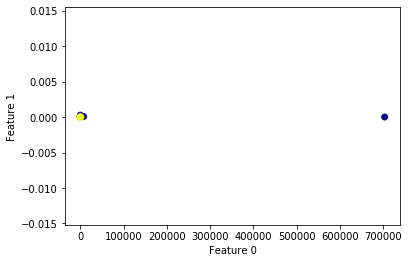

In [376]:
#Ref: https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea
#Ref: https://medium.com/@plog397/functions-to-plot-kmeans-hierarchical-and-dbscan-clustering-c4146ed69744
#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.123, min_samples = 3).fit(X_scaled)

clusters = dbscan.fit_predict(X_scaled)

print (clusters)

# plot the cluster assignments
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

As shown above only one cluster is created and 7 outliers are plotted, the cluster is shown as yellow and outliers as blue, These clustering is done using density and area as parameters as most of teh densities are in the same range and distance between then not much only one cluster is obtained

##### DBSCAN using density as feature to categorize the data 

[ 0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]


Text(0, 0.5, 'Feature 1')

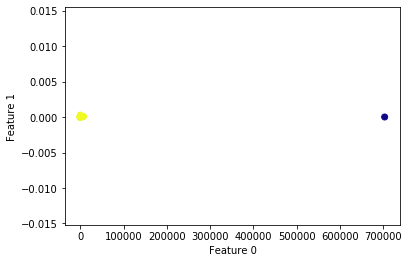

In [377]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['desnity']])

dbscan = DBSCAN(eps=0.123, min_samples = 3).fit(X_scaled)

clusters = dbscan.fit_predict(X_scaled)

print (clusters)

# plot the cluster assignments
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Above Cluster plot depicts the DBSCAN results for density feature alone, So only one outlier is found if the DBScan is performed with density feature alone

##### Categorizing using unsupervized Kmeans algorithm based on the densities of AIS mesages in different ports 

In [378]:
#Ref: https://www.datascience.com/blog/k-means-clustering
import numpy as np
from sklearn.cluster import KMeans

X=np.matrix(portDensities)
kmeans = KMeans(n_clusters=5).fit(X)

In [379]:
#All the 26 ports are categorized into 5 groups 
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 4, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0], dtype=int32)

As shown above port 7 is categorized as 1 , port 9 is categorized as 2, port 10 & port 20  is categorized as 3 and rest all are categorized as 0 based on their traffic densities